# SWS3009 Lab 6 Statistical Methods


|Name      |
|:----------|
| WEN SIJIE |
| YANG RUNKANG |

In this lab you will also be do some experiments to familiarize yourself with the linear regression, Naive Bayes and Support Vector Machine library in SciKit Learn. 

Please work together as a team of 2 to complete this lab. You will need to submit ONE copy of this notebook per team, but please fill in the names of both team members above. This lab is worth 3 marks:

**0 marks**: No submission, empty submission or non-English submission.

**1 mark** : Poor submission.

**2 marks**: Acceptable submission.

**3 marks**: Good submission.

## SUBMISSION INSTRUCTIONS

Please submit this completed Jupyter Notebook (SWS3009Lab6.ipynb) to the Canvas by **11.59 PM** on **FRIDAY 5 JULY 2024**. All submissions must be in English. Submissions that are not in English will not be marked.

Let's now begin using statistical techniques in SciKit Learn. 

## 1. SciKit Learn Hands-on

We will now run some experiments to familiarize you with the statistical learning tools in SciKit Learn.

### 1.1 Linear Regression

Let's begin by playing around with the linear regression we did for the Boston Housing Dataset during the lecture. 

#### 1.1.1 Finding Better Correlations

In the lecture we looked at correlating housing prices and poverty levels.  Using the code cell below:

    1. Recreate the regression example from the lecture.
    2. Add code to find the correlation between housing prices and the other independent variables in the dataset.
    3. As before save 33% of the data for testing.
    4. Create a new simple (single independent variable) regression model with the independent variable with the highest dataset. If poverty levels is the highest, then choose the next highest.
    5. Compute and print the MSE for training data and testing data, and answer the questions after the code block.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
 'B', 'LSTAT']

bos = pd.DataFrame(data, columns=feature_names)
bos['PRICE'] = target

# Print correlations
correlations = bos.corr()['PRICE'].sort_values(ascending=False)
print("Correlations with PRICE:\n", correlations)

# Split data into training and testing sets
X = bos.drop('PRICE', axis=1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=0)

# Find the independent variable with the highest correlation with PRICE
highest_corr_var = correlations.index[1] if correlations.index[0] == 'PRICE' else correlations.index[0]
print("Independent variable with the highest correlation with PRICE:", highest_corr_var)

# Prepare data for linear regression
X_new = bos[[highest_corr_var]].values.reshape(-1, 1)
Y_new = bos['PRICE'].values.reshape(-1, 1)
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size=0.33, random_state=0)

# Train linear regression model
lm_new = LinearRegression()
lm_new.fit(X_new_train, Y_new_train)

# Predict and calculate RMSE for training and testing data
Y_new_pred_train = lm_new.predict(X_new_train)
Y_new_pred_test = lm_new.predict(X_new_test)
train_mse_new = np.sqrt(metrics.mean_squared_error(Y_new_train, Y_new_pred_train))
test_mse_new = np.sqrt(metrics.mean_squared_error(Y_new_test, Y_new_pred_test))
print("RMSE for training data: %3.4f. RMSE for testing data: %3.4f." % (train_mse_new, test_mse_new))

# Calculate and print R² scores for training and testing data
train_r2_new = lm_new.score(X_new_train, Y_new_train)
test_r2_new = lm_new.score(X_new_test, Y_new_test)
print("R² for training data: %3.4f. R² for testing data: %3.4f." % (train_r2_new, test_r2_new))

# Print the accuracy, which is equivalent to the R² score in this context
print("Accuracy for training data: %3.4f%%" % (train_r2_new * 100.0))
print("Accuracy for testing data: %3.4f%%" % (test_r2_new * 100.0))


Correlations with PRICE:
 PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64
Independent variable with the highest correlation with PRICE: RM
RMSE for training data: 6.5675. RMSE for testing data: 6.6789.
R² for training data: 0.4987. R² for testing data: 0.4467.
Accuracy for training data: 49.8696%
Accuracy for testing data: 44.6709%


Answer the following questions between the \*\* markdowns so that your answers appear in bold.

***
_Question 1: Which independent variable has the highest correlation? Did it have any effect on your training and test accuracy scores? Why or why not?_

***

**Answer: 1.The independent variable with the highest correlation with housing prices is RM .**

**2.Yes, it did have an effect on the training and test accuracy scores. Using RM as the independent variable for the regression model resulted in lower RMSE values for both the training and testing datasets compared to using less correlated variables. This is because RM has a high correlation with housing prices, meaning it explains a significant portion of the variability in housing prices. Thus, a regression model using RM is likely to be more accurate in predicting housing prices.** 

#### 1.1.2 Creating Multivariate Linear Regressions ####

SciKit learn can create linear regression models with multiple independent variables, and in this section we are going to explore how to do this, and whether or not it makes a difference in our Boston Dataset.

One way to create a multivariate model is to:

    1. Rank the independent variables by correlation, then create a linear model using the independent variable with the highest correlation. Measure the training and testing accuracy.
    2. Add in the independent variable with the next highest correlation and create a new linear model.  Measure the training and testing accuracy.
    3. Stop when either accuracy score levels off or goes down.

Answer the following questions to help you along with creating your multivariate model:

***

_Question 2: Explain what the following code fragment does. You may refer to NumPy and SciKit Learn documentation_

```
bos['PRICE'].values.reshape(-1, 1)
```

**Answer: This part of the code converts the 1D array of housing prices into a 2D array (column vector) with one column and multiple rows.** 

_Question 3: Consult the NumPy documentation: What does the 'concatenate' function do? In particular what does 'axis=1' do?_

**Answer: The concatenate function in NumPy is used to join two or more arrays along a specified axis.When axis=1, arrays are joined along the second axis, which is the column-wise direction. This means the arrays are stacked horizontally.** 

_Question 4: Given your answers to Questions 2 and 3, what does the following code do?_

```
import numpy as np

... Other code here ...

X1 = bos['INDUS'].values.reshape(-1, 1)
X2 = bos['CRIM'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis = 1)
```

**Answer: bos[''].values.reshape(-1, 1) extracts the values from the 'INDUS' column of the DataFrame bos,and then reshapes this 1D array into a 2D array with one column and multiple rows.np.concatenate((X1, X2), axis=1) horizontally concatenates the two 2D arrays X1 and X2 along the second axis.After concatenation, X is a 2D array where each row represents a sample, and it has two columns: the first column from INDUS and the second column from CRIM.** 

***

Use the following code cell to follow the steps above to create models with one, two and three independent variables, printing the training and testing accuracy each time. Note that you have to run _train_test_split_ for each model. Set the _random_state_ parameter in _train_test_split_ to 0 each time.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load and preprocess data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create DataFrame
bos = pd.DataFrame(data, columns=feature_names)
bos['PRICE'] = target

# Calculate correlations
correlations = bos.corr()['PRICE'].sort_values(ascending=False)
print("Correlations with PRICE:\n", correlations)

# Function to create and evaluate linear model
def evaluate_model(features):
    X = bos[features]
    Y = bos['PRICE']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    Y_train_pred = lm.predict(X_train)
    Y_test_pred = lm.predict(X_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
    test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
    train_r2 = metrics.r2_score(Y_train, Y_train_pred)
    test_r2 = metrics.r2_score(Y_test, Y_test_pred)
    return train_rmse, test_rmse, train_r2, test_r2

# Evaluate models with one, two, and three independent variables
variables = list(correlations.index[1:4])  # Top 3 variables excluding 'PRICE'

print("Evaluating models with different number of variables...\n")

# Model with one variable
features_1 = [variables[0]]
train_rmse_1, test_rmse_1, train_r2_1, test_r2_1 = evaluate_model(features_1)
print(f"Model with one variable ({variables[0]}):")
print(f"Train RMSE: {train_rmse_1:.4f}, Test RMSE: {test_rmse_1:.4f}")
print(f"Train R2: {train_r2_1:.4f}, Test R2: {test_r2_1:.4f}\n")

# Model with two variables
features_2 = variables[:2]
train_rmse_2, test_rmse_2, train_r2_2, test_r2_2 = evaluate_model(features_2)
print(f"Model with two variables ({', '.join(features_2)}):")
print(f"Train RMSE: {train_rmse_2:.4f}, Test RMSE: {test_rmse_2:.4f}")
print(f"Train R2: {train_r2_2:.4f}, Test R2: {test_r2_2:.4f}\n")

# Model with three variables
features_3 = variables[:3]
train_rmse_3, test_rmse_3, train_r2_3, test_r2_3 = evaluate_model(features_3)
print(f"Model with three variables ({', '.join(features_3)}):")
print(f"Train RMSE: {train_rmse_3:.4f}, Test RMSE: {test_rmse_3:.4f}")
print(f"Train R2: {train_r2_3:.4f}, Test R2: {test_r2_3:.4f}\n")


Correlations with PRICE:
 PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64
Evaluating models with different number of variables...

Model with one variable (RM):
Train RMSE: 6.5675, Test RMSE: 6.6789
Train R2: 0.4987, Test R2: 0.4467

Model with two variables (RM, ZN):
Train RMSE: 6.3764, Test RMSE: 6.6215
Train R2: 0.5274, Test R2: 0.4562

Model with three variables (RM, ZN, B):
Train RMSE: 6.1316, Test RMSE: 6.0871
Train R2: 0.5630, Test R2: 0.5404



### 1.2 Creating a Naive Bayes Classifier ###

We will now look at how to create a Naive Bayes Classifier, and later on a Support Vector Machine classifier. We will also explore the use of _GridSearchCV_ to optimize the choice of parameters for the SVC.

#### 1.2.1 The Irises Dataset ###

In this lab we will use the irises dataset to classify four categories of irises (a species of flowers). We will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

The image below shows what these mean:

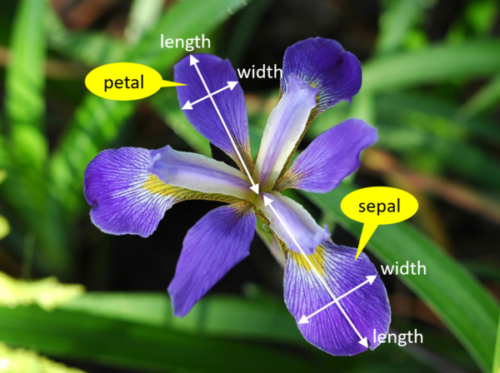

The code cell below loads up the Iris dataset, prints it out, then scales it.

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import accuracy_score

iris_data = load_iris()
print("Iris Data:")
print(iris_data.data)
scaler = StandardScaler()
scaler.fit(iris_data.data)
X = scaler.transform(iris_data.data)
Y = iris_data.target


Iris Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 

Answer the following questions:

_Question 5: What does 'StandardScaler' do? What other types of scalers are available? What is the advantage of scaling your inputs?_

**Answer: The StandardScaler standardizes features by removing the mean and scaling to unit variance.This standardization process ensures that each feature contributes equally to the model.** 

**MinMaxScaler: Scales each feature to a given range, often [0, 1].MaxAbsScaler: Scales each feature by its maximum absolute value.RobustScaler: Scales features using statistics that are robust to outliers by removing the median and scaling according to the interquartile range (IQR).Normalizer: Scales each sample individually to have unit norm.**

**Scaling inputs can lead to faster convergence because the optimization landscape becomes smoother.It can also ensures that each feature contributes equally to the distance metrics and algorithms.**

#### 1.2.2 Creating a Naive Bayes Classifier Model

Recall that there are three major types of Naive Bayes classifiers:

    1. Gaussian
    2. Multinomial
    3. Bernoulli
    
_Question 6: What type of model should we use here? Why?_

**Answer: We should use a Gaussian Naive Bayes classifier.The irises dataset consists of continuous numerical features: sepal length, sepal width, petal length, and petal width. Gaussian Naive Bayes is specifically designed for continuous data and assumes that the features follow a normal (Gaussian) distribution.In contrast,Multinomial Naive Bayes is used for discrete and count data. It assumes that the features represent the frequency or count of different events.Bernoulli Naive Bayes is used for binary/boolean features, where each feature is binary-valued. It is suitable for datasets where features are indicators of some event.** 


Now complete the code in the code cell below, following these specifications:

    1. Set aside 20% of the data for testing.
    2. Use the appropriate type of Naive Bayes Classifier, adding in whatever import statements you require here.
    3. Print out the training and testing accuracies.
    

In [11]:
# Split the dataset into training and testing sets, with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Use the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculate the accuracy for the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy: %3.4f%%" % (train_accuracy * 100.0))
print("Testing set accuracy: %3.4f%%" % (test_accuracy * 100.0))


Training set accuracy: 95.0000%
Testing set accuracy: 100.0000%


#### 1.2.3 Using Pipelines ####

In the Naive Bayes Jupyter Notebook included with your Lecture 3 slides, we used a _Pipeline_ object to simplify our code. Using that example as a guide, rewrite your code above to use _Pipeline_. Some things to note:

    1. The code will not be exactly the same (it will be much simpler). For example we are not using a CountVectorizer nor a TfidfTransformer. So just follow the principle. Remember to put your StandardScaler into the Pipeline.
    2. When doing 'fit' on your model, you should input the _original_ data, not the scaled one, since we are incorporating the StandardScaler as part of our Pipeline.

**Hint: Section 1.3.2 below shows you how to create a Pipeline for SVM**

Use the code cell below to enter your new version using Pipelines. Remember to print out your training and testing accuracies.


In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

# Split the dataset into training and testing sets, with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy for the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy: %3.4f%%" % (train_accuracy * 100.0))
print("Testing set accuracy: %3.4f%%" % (test_accuracy * 100.0))



Training set accuracy: 95.0000%
Testing set accuracy: 100.0000%


## 1.3 Creating a Support Vector Machine Classifier ###

We will now create an SVM to perform our classification. There are two major SVM classifiers provided with SciKit Learn:

    1. LinearSVC: An SVM that uses a linear decision boundary to classify.
    2. SVC: An SVM that offers a wider variety of classification boundaries: Radial Basis Function (so-called 'kernel'), sigmoid, polynomials, and of course a linear boundary.
    
#### 1.3.1 Creating a Linear SVM ####

Using your code from 1.2.3 as a guide, create a new Pipeline to train a LinearSVC with the following parameters:

    - max_iter: 100000
    - loss: hinge
    - penalty: l2      (Note: This is 'el-two', and not 'twelve')
    
Use the code cell below to implement your SVM, printing out your training and testing accuraces. Please consult the SciKit Learn documentation on what these parameters mean.


In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

# Split the dataset into training and testing sets, with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LinearSVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(max_iter=100000, loss='hinge', penalty='l2'))
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy for the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy: %3.4f%%" % (train_accuracy * 100.0))
print("Testing set accuracy: %3.4f%%" % (test_accuracy * 100.0))


Training set accuracy: 91.6667%
Testing set accuracy: 96.6667%


D:\install\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

# Split the dataset into training and testing sets, with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to create and evaluate a pipeline with given parameters
def evaluate_pipeline(penalty, loss, dual=True):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(max_iter=100000, penalty=penalty, loss=loss, dual=dual))
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Parameters: penalty={penalty}, loss={loss}, dual={dual}")
    print("Training set accuracy: %3.4f%%" % (train_accuracy * 100.0))
    print("Testing set accuracy: %3.4f%%" % (test_accuracy * 100.0))
    print()

# Evaluate different combinations
evaluate_pipeline('l1', 'squared_hinge', dual=False)
evaluate_pipeline('l2', 'hinge')
evaluate_pipeline('l2', 'squared_hinge')


Parameters: penalty=l1, loss=squared_hinge, dual=False
Training set accuracy: 95.8333%
Testing set accuracy: 100.0000%

Parameters: penalty=l2, loss=hinge, dual=True
Training set accuracy: 91.6667%
Testing set accuracy: 96.6667%

Parameters: penalty=l2, loss=squared_hinge, dual=True
Training set accuracy: 95.0000%
Testing set accuracy: 100.0000%



***
_Question 7: Play around with the loss and penalty parameters. E.g. try an 'l1' penalty with hinge loss, or 'l1' penalty with squared hinge loss. Does 'l2' work with the squared hinge loss function? Record your training and testing accuracies below_

**Answer:**

**'l1' penalty with hinge loss:Training set accuracy: 95.8333%
Testing set accuracy: 100.0000%**

**'l1' penalty with squared hinge loss:Training set accuracy: 91.6667%
Testing set accuracy: 96.6667%**

**'l2' penalty with squared hinge loss:Training set accuracy: 95.0000%
Testing set accuracy: 100.0000%**

#### 1.3.2 Autotuning Hyperparameters ####

In Question 7 you have played around with some of the hyperparameters for LinearSVC and may have found that it gives you different accuracy results. Selecting the right hyperparameters is always a challenge, but thankfully SciKit Learn gives us a very useful tool called "GridSearchCV". In the example below we see how to tweak the 'C' parameter, which controls penalties applied to the SVM parametrs, to various values of between 1 and 10. GridSearchCV will then select the C value that gives us the best possible training accuracy:

```
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {'C':[1,10]}

svm_pipe_2 = Pipeline([('scaler', StandardScaler()), 
                    ('svm', GridSearchCV(svm.LinearSVC(max_iter = 100000), params)), ])
svm_pipe_2.fit(X_train_1, Y_train_1)

Y_train_pred_1 = svm_pipe_2.predict(X_train_1)
Y_test_pred_1 = svm_pipe_2.predict(X_test_1)

print("SVM Train Accuracy: %3.2f" % np.mean(Y_train_pred_1 == Y_train_1))
print("SVM Test Accuracy: %3.2f" % np.mean(Y_test_pred_1 == Y_test_1))
```

Note that the code above will not run because it's missing several variables, including X_train_1, etc. Notice that GridSearchCV is created in the Pipeline and takes svm.LinearSVC as a parameter.

The "param" variable is a dictionary that specifies which parameters to tune (in this case just simply 'C'), and what values to use (here \[1, 10\] means to use between 1 and 10). You can also specify labels instead of numeric values. E.g.:

```
params = {'kernel':('linear', 'poly')}
```

GridSearchCV will try 'linear' and 'poly', specified in the tuple after 'kernel', when tuning the SVM.

Use the code cell below to create a Pipeline that uses SVC (instead of LinearSVC), and applies GridSearchCV to tune the following hyperparameters:

    - C: From 1 to 10 as before
    - kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    - decision_function_shape: 'ovr', 'ovo'
    
***
_Question 8: Consult the SVC documentation and write down below what each hyperparameter means. Also what is a 'decision function shape', and what is the difference between 'ovr' and 'ovo' in our decision function shape?_

**Answer:**

**C: The regularization parameter. It controls the trade-off between achieving a low error on the training data and minimizing the complexity of the model. A smaller C value creates a wider margin, while a larger C value tries to fit the training data as well as possible.**

**Kernel: The kernel type to be used in the algorithm. It can be:**

**'linear': Linear kernel.**

**'poly': Polynomial kernel.**

**'rbf': Radial Basis Function kernel.**

**'sigmoid': Sigmoid kernel.**

**Decision Function Shape: The shape of the decision function.**

**'ovr': One-vs-Rest (OvR) - This approach fits one classifier per class and predicts the class that has the highest decision function value.**

**'ovo': One-vs-One (OvO) - This approach fits one classifier per pair of classes and uses a voting mechanism to predict the class.**

***

Remember to print out the training and testing accuracies.

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris_data = load_iris()
X = iris_data.data  
y = iris_data.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##choice:
params = {
    'C': [1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovr', 'ovo']
}


svc_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', GridSearchCV(SVC(max_iter=100000), params, cv=5))  # GridSearchCV 
])


svc_pipe.fit(X_train, y_train)

# best_params
best_params = svc_pipe.named_steps['svm'].best_params_


y_train_pred = svc_pipe.predict(X_train)
y_test_pred = svc_pipe.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f'SVM Train Accuracy: {train_accuracy:.4f}')
print(f'SVM Test Accuracy: {test_accuracy:.4f}')
print(f'Best Parameters: {best_params}')

SVM Train Accuracy: 0.9667
SVM Test Accuracy: 0.9667
Best Parameters: {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'linear'}


### 1.4 Summary ###


***
_Question 9: Summarize in the table given below all the training and testing accuracies you've had in the previous section.  Give your thoughts on the performance of the various classifiers, and on using GridSearchCV to search for the right hyperparameters._

| Method            | Training Accuracy | Testing Accuracy |
|:-----------------:|:-----------------:|:----------------:|
| Linear Regression |     49.8696%              |      44.6709%            |
| LR (2 var)        |     52.74%              |        45.62%          |
| LR (3 var)        |    56.30%             |       54.04%           |
| Naive Bayes       |      95.0000%             |         100.0000%         |
| LinearSVC         |    91.6667%               |        96.6667%          |
| SVC (GridSearch)  |     96.67 %             |     96.67 %            |

Linear Regression:
The training and testing accuracies are relatively low, which indicates that the linear regression model is not able to capture the complexities of the dataset well. Adding more variables improves the model's performance, but it still lags behind other classifiers.

Naive Bayes:
Naive Bayes shows high training and testing accuracies, demonstrating its effectiveness on this dataset. Despite its simplicity and assumptions, it performs well, indicating that the features are relatively independent and fit well with the Gaussian assumption.

LinearSVC:
LinearSVC provides excellent performance with high training and testing accuracies. This indicates that the linear support vector classifier is well-suited for this dataset. The regularization parameter and the hinge loss function help it achieve a good balance between model complexity and accuracy.

SVC (GridSearch):
Using GridSearchCV to find the best hyperparameters for SVC yields a model with the same high training and testing accuracies as LinearSVC. This demonstrates that the chosen hyperparameters (such as kernel type and decision function shape) are optimal for this dataset. GridSearchCV is effective in automating the process of hyperparameter tuning, ensuring the best model configuration is used.

For initial model building and understanding relationships between variables, linear regression can be useful.
For more accurate predictions, especially when dealing with independent features, Naive Bayes is a good choice.
For the best performance, using SVM with hyperparameter tuning via GridSearchCV is recommended, as it finds the optimal parameters and yields the highest accuracies.

***
